# Normalize Data

#### TOC
- [Provide Use Case Parameters](#Provide-Use-Case-Parameters)
- [Read DataFrame from the CSV file](#Read-DataFrame-from-the-CSV-file)
- [Function to normalize the data](#Function-to-normalize-the-data)
- [Write DataFrame to the CSV file](#Write-DataFrame-to-the-CSV-file)

# Provide Use Case Parameters

In [17]:
using DataFrames, CSV, Dates, Plots

file_name = "market_indicators.csv"
original_column   = 3  # original data
normalized_column = 4  # to be populated with normalized values

4

# Read DataFrame from the CSV file

In [18]:
df = CSV.read(file_name)

# Show the values of the cololumn with the original data
show(df[:,original_column:normalized_column], allcols=true)

1623×2 DataFrame
│ Row  │ 3. ISM Mfc │ 4. ISM Mfc norm │
│      │ Float64    │ Float64?        │
├──────┼────────────┼─────────────────┤
│ 1    │ 43.3       │ 0.0             │
│ 2    │ 45.4       │ missing         │
│ 3    │ 49.5       │ missing         │
│ 4    │ 53.0       │ missing         │
│ 5    │ 48.4       │ missing         │
│ 6    │ 45.1       │ missing         │
│ 7    │ 42.1       │ missing         │
│ 8    │ 47.2       │ missing         │
│ 9    │ 42.4       │ missing         │
│ 10   │ 35.0       │ missing         │
⋮
│ 1613 │ 48.5       │ missing         │
│ 1614 │ 48.5       │ missing         │
│ 1615 │ 48.1       │ missing         │
│ 1616 │ 48.1       │ missing         │
│ 1617 │ 47.8       │ missing         │
│ 1618 │ 47.8       │ missing         │
│ 1619 │ 50.9       │ missing         │
│ 1620 │ 50.9       │ missing         │
│ 1621 │ 50.1       │ missing         │
│ 1622 │ 50.1       │ missing         │
│ 1623 │ 49.1       │ missing         │

# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

In [19]:
function normalize(df, original_column, normalized_column)
    original = df[:, original_column]
    items = length(original) 
    
    min = minimum(original)
    max = maximum(original)   

    for i in 1:items
        value = (original[i] - min) / (max - min) # normalization formula 0.0 to 1.0
        #value = value * 100                    # 0.0 to 100
        value = value * 200                    # 0.0 to 200
        value = value - 100                    # -100 to 100
        value = round(value, digits=2)         # 0.00 
        df[i, normalized_column] = value
    end
    return df[:, normalized_column]
end

data_normalized = normalize(df, original_column, normalized_column)

1623-element SentinelArrays.SentinelArray{Float64,1,Float64,Missing,Array{Float64,1}}:
 -42.2
 -33.47
 -16.42
  -1.87
 -21.0
 -34.72
 -47.19
 -25.99
 -45.95
 -76.72
 -85.45
 -92.1
 -78.79
   ⋮
 -21.83
 -20.58
 -20.58
 -22.25
 -22.25
 -23.49
 -23.49
 -10.6
 -10.6
 -13.93
 -13.93
 -18.09

# x-axis: Dates: get only mm/yyyy

- Since multiple rows share one year, using just year makes a choppy graph.
- Since days of the month are missing and are are not evenly spaced, it is bad idea to use them.
- Since we have all the months they make for acceptable values on the x-axis.
- In the future, I might create more granual scale.

In [23]:
dates = df[:,2] # e.g. 1948-03-31
columns = length(dates)
periods = Array{String, 1}(undef, columns) # define array to hold x-axis values

for i in 1:columns
    periods[i] = string( Dates.month(dates[i]), "/", Dates.year(dates[i])   ) # e.g. 3/1948
end
periods

1623-element Array{String,1}:
 "3/1948"
 "4/1948"
 "5/1948"
 "6/1948"
 "7/1948"
 "8/1948"
 "9/1948"
 "10/1948"
 "11/1948"
 "12/1948"
 "1/1949"
 "2/1949"
 "3/1949"
 ⋮
 "9/2019"
 "10/2019"
 "10/2019"
 "11/2019"
 "11/2019"
 "12/2019"
 "12/2019"
 "1/2020"
 "1/2020"
 "2/2020"
 "2/2020"
 "3/2020"

# Draw plots

If the normalization above was done right, the plots retain exactly same shape, regardless that y-axis (vertical) is scaled.

- https://docs.juliaplots.org/latest/layouts/

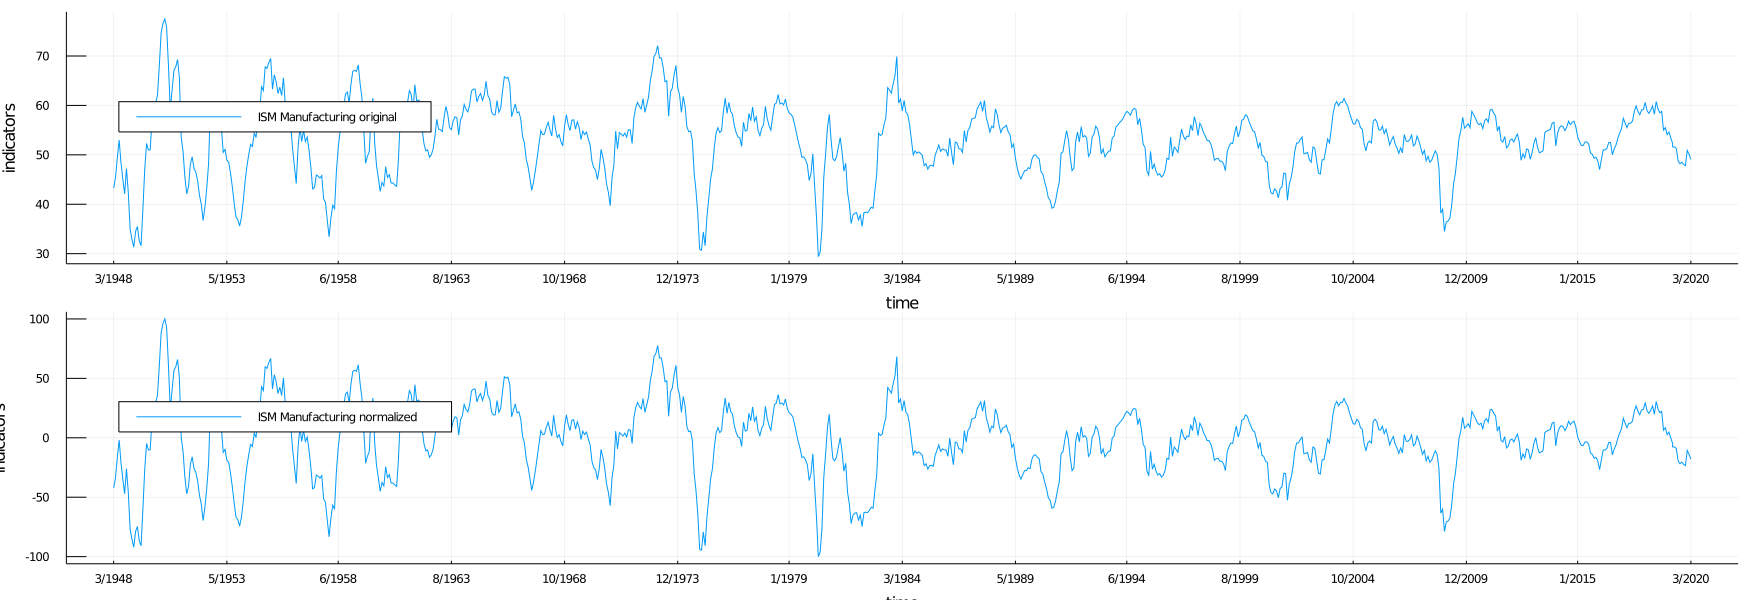

In [24]:
gr()
plot(periods, 
    [df[:,original_column]  df[:,normalized_column]  ], 
    label    = ["ISM Manufacturing original" "ISM Manufacturing normalized"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (2, 1)
    )

# Write DataFrame to the CSV file

In [25]:
CSV.write(file_name, df, delim=',', header=true)

"market_indicators.csv"

In [26]:
show(df[:,original_column:normalized_column], allcols=true)

1623×2 DataFrame
│ Row  │ 3. ISM Mfc │ 4. ISM Mfc norm │
│      │ Float64    │ Float64?        │
├──────┼────────────┼─────────────────┤
│ 1    │ 43.3       │ -42.2           │
│ 2    │ 45.4       │ -33.47          │
│ 3    │ 49.5       │ -16.42          │
│ 4    │ 53.0       │ -1.87           │
│ 5    │ 48.4       │ -21.0           │
│ 6    │ 45.1       │ -34.72          │
│ 7    │ 42.1       │ -47.19          │
│ 8    │ 47.2       │ -25.99          │
│ 9    │ 42.4       │ -45.95          │
│ 10   │ 35.0       │ -76.72          │
⋮
│ 1613 │ 48.5       │ -20.58          │
│ 1614 │ 48.5       │ -20.58          │
│ 1615 │ 48.1       │ -22.25          │
│ 1616 │ 48.1       │ -22.25          │
│ 1617 │ 47.8       │ -23.49          │
│ 1618 │ 47.8       │ -23.49          │
│ 1619 │ 50.9       │ -10.6           │
│ 1620 │ 50.9       │ -10.6           │
│ 1621 │ 50.1       │ -13.93          │
│ 1622 │ 50.1       │ -13.93          │
│ 1623 │ 49.1       │ -18.09          │

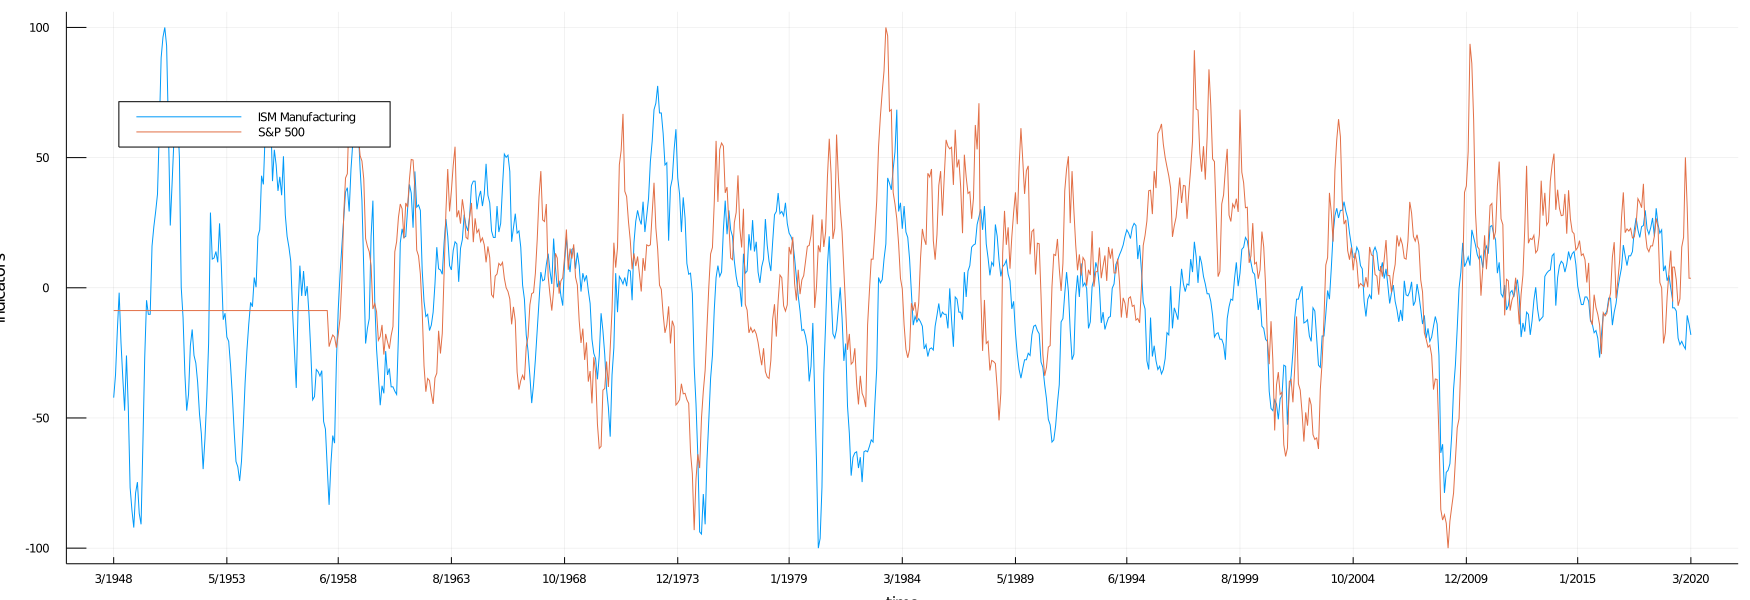

In [46]:
data1 = df[:,4]
data2 = df[:,8]

gr()
plot(periods, 
    [ data1  data2 ], 
    label    = ["ISM Manufacturing" "S&P 500"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (1, 1)
    )